# Retail Store Inventory Forecasting Analysis

## Retail Demand Forecasting with SARIMAX

Retail businesses must decide how much stock to hold and when to reorder in an environment driven by promotions, pricing, seasonality, and customer behaviour. Forecasting demand using only historical sales often leads to stock-outs during peak periods and excess inventory during slow periods.

This project builds a data-driven demand forecasting model that incorporates pricing, discounts, competitor behaviour, seasonality, regional demand and product mix to produce more accurate and commercially relevant forecasts. Using a SARIMAX time-series model, we capture both short-term dynamics and a recurring 10-day demand cycle, allowing the business to plan inventory, promotions, and cash flow more effectively.

The goal is to move from reactive reporting to proactive inventory and revenue planning.

## Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Data Cleaning & Transformation

In [2]:
demand_forecast = pd.read_csv('retail_store_inventory.csv')
print(demand_forecast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [3]:
demand_forecast['date']= pd.to_datetime(demand_forecast['Date'])

In [46]:
demand_forecast_1= demand_forecast.drop(columns=['Date'])
print(demand_forecast_1.columns)

Index(['Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level',
       'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount',
       'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing',
       'Seasonality', 'date'],
      dtype='object')


## Daily Forecast Plot

In [7]:
daily_forecast = (
    demand_forecast
    .groupby("date")["Demand Forecast"]
    .sum()
    .reset_index()
)

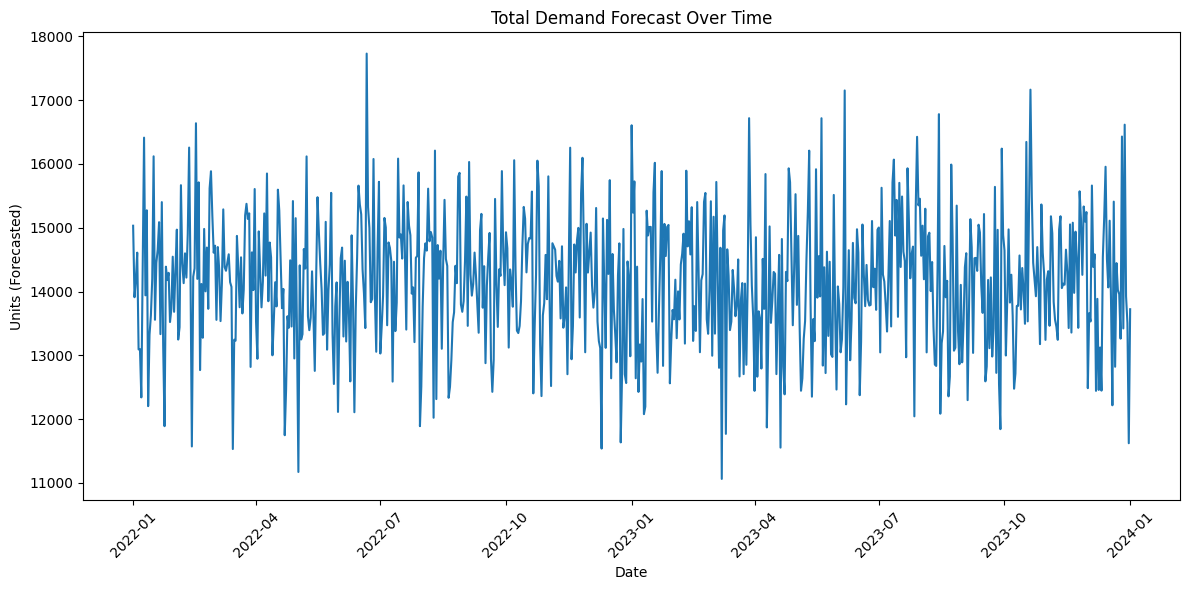

In [47]:
plt.figure(figsize=(12,6))
plt.plot(daily_forecast["date"], daily_forecast["Demand Forecast"])

plt.title("Total Demand Forecast Over Time")
plt.xlabel("Date")
plt.ylabel("Units (Forecasted)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [9]:
#pip install statsmodels 

## AD-Fuller for Stationary Test

In [10]:
from statsmodels.tsa.stattools import adfuller

# Use the daily demand forecast series
series = daily_forecast["Demand Forecast"]

result = adfuller(series)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -26.171364254639805
p-value: 0.0
Critical Values:
   1%: -3.4393396487377155
   5%: -2.865507363200066
   10%: -2.5688826684180897


## PACF & ACF Plots

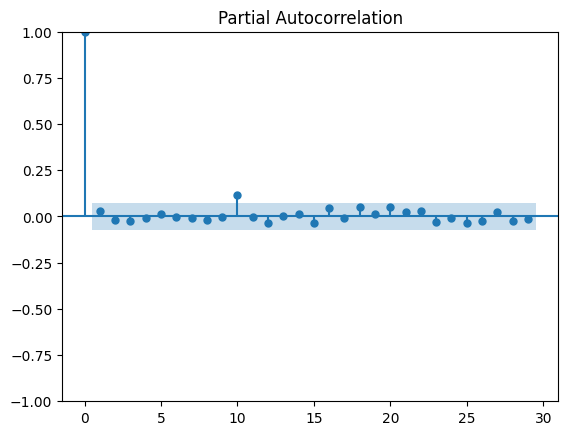

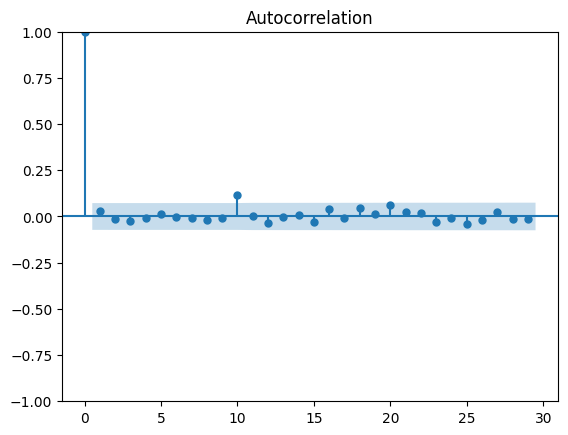

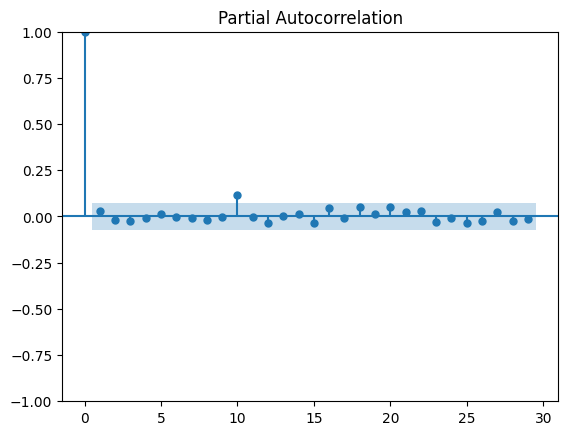

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ts = daily_forecast.set_index("date")["Demand Forecast"]
plot_acf(ts)
plot_pacf(ts)


## Transformation of Categorical variables into dummy variables 

In [16]:
demand_forecast_1['Category'].unique()

array(['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing'],
      dtype=object)

In [17]:
demand_forecast_1['Region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [19]:
demand_forecast_1['Weather Condition'].unique()

array(['Rainy', 'Sunny', 'Cloudy', 'Snowy'], dtype=object)

In [20]:
demand_forecast_1['Seasonality'].unique()

array(['Autumn', 'Summer', 'Winter', 'Spring'], dtype=object)

In [22]:
cat_vars = ["Category", "Region", "Weather Condition", "Seasonality"]

encoded = pd.get_dummies(demand_forecast_1[cat_vars], drop_first=True)


In [25]:
encoded

,Category_Electronics,Category_Furniture,Category_Groceries,Category_Toys,Region_North,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,False,False,True,False,True,False,False,True,False,False,False,False,False
1,False,False,False,True,False,True,False,False,False,True,False,False,False
2,False,False,False,True,False,False,True,False,False,True,False,True,False
3,False,False,False,True,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,False,True,False,False,False,False,False,False,True,False,False,False,True
73096,False,False,False,True,True,False,False,False,False,False,False,False,False
73097,False,False,False,False,False,False,True,True,False,False,False,False,True
73098,False,False,False,True,False,False,False,True,False,False,True,False,False


## Concatinate dummy variables with numerical variables 

In [42]:
# 1) One-hot encode categorical variables
cat_vars = ["Category", "Region","Seasonality"]
encoded = pd.get_dummies(demand_forecast_1[cat_vars], drop_first=True)

# 2) Combine with numeric variables (edit list if your columns differ)
num_vars = ["Discount", "Competitor Pricing"]
X = pd.concat([demand_forecast_1[num_vars], encoded], axis=1)

# 3) Aggregate to daily level (exog must match y index)
X_daily = X.groupby(demand_forecast_1["date"]).mean()

# 4) Target series
y = demand_forecast_1.groupby("date")["Demand Forecast"].sum()

In [43]:
y.shape, X_daily.shape

((731,), (731, 12))

## SARIMAX(1,0,0,10)

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    y,
    exog=X_daily,
    order=(0,0,0),
    seasonal_order=(1,0,0,10),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit()
print(model_fit.summary())


C:\Users\bertr\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bertr\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:          Demand Forecast   No. Observations:                  731
Model:             SARIMAX(1, 0, 0, 10)   Log Likelihood               -6061.574
Date:                  Wed, 04 Feb 2026   AIC                          12151.149
Time:                          12:10:49   BIC                          12215.277
Sample:                      01-01-2022   HQIC                         12175.904
                           - 01-01-2024                                         
Covariance Type:                    opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Discount               154.5240     56.489      2.735      0.006      43.808     265.240
Competitor Pricing      66.9799     13.205      5.072      0.000      41.098      92.